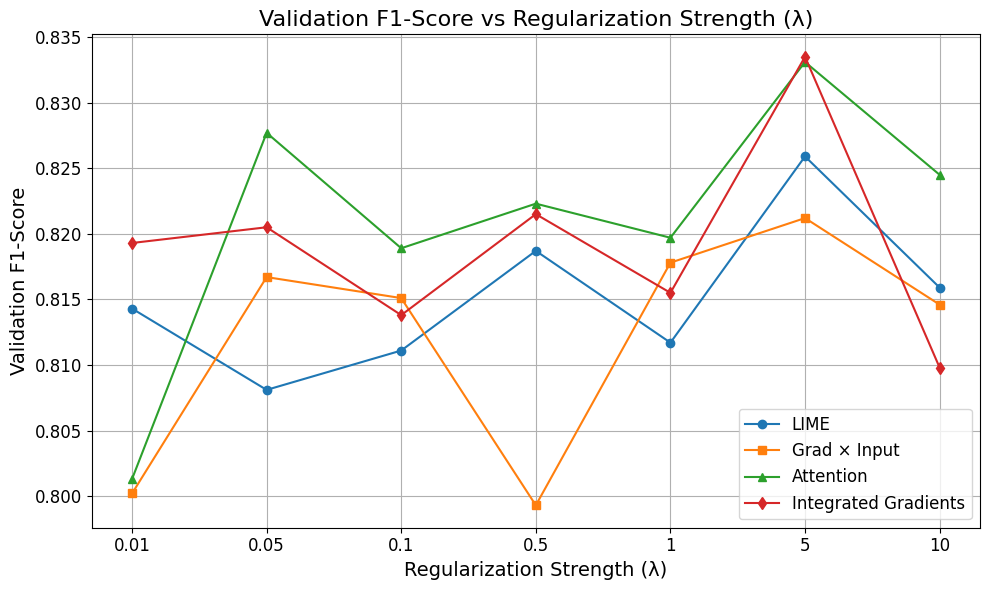

In [ ]:
import matplotlib.pyplot as plt

# Data
lime = [0.8143,0.8081,0.8111,0.8187,0.8117,0.8259,0.8159]
gxi = [0.8002, 0.8167, 0.8151, 0.7993, 0.8178,0.8212, 0.8146]
attention = [0.8013, 0.8277, 0.8189, 0.8223, 0.8197,0.8331,0.8245]
ig = [0.8193, 0.8205, 0.8138, 0.8215, 0.8155, 0.8335,0.8098]
lambdas = [0.01, 0.05, 0.1, 0.5, 1, 5, 10]

lambda_labels = [str(l) for l in lambdas]
x_pos = list(range(len(lambdas)))  # Equally spaced x-axis positions

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_pos, lime, marker='o', label='LIME')
plt.plot(x_pos, gxi, marker='s', label='Grad × Input')
plt.plot(x_pos, attention, marker='^', label='Attention')
plt.plot(x_pos, ig, marker='d', label='Integrated Gradients')

# Graph details with increased font sizes
plt.title('Validation F1-Score vs Regularization Strength (λ)', fontsize=16)
plt.xlabel('Regularization Strength (λ)', fontsize=14)
plt.ylabel('Validation F1-Score', fontsize=14)
plt.xticks(x_pos, lambda_labels, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


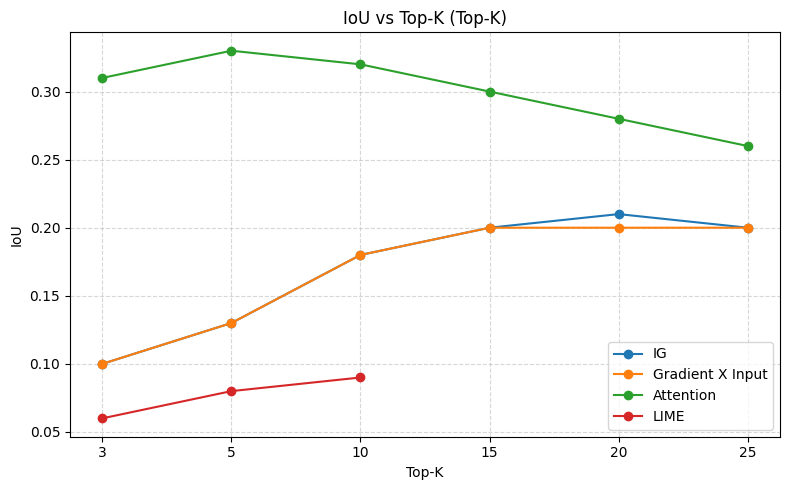

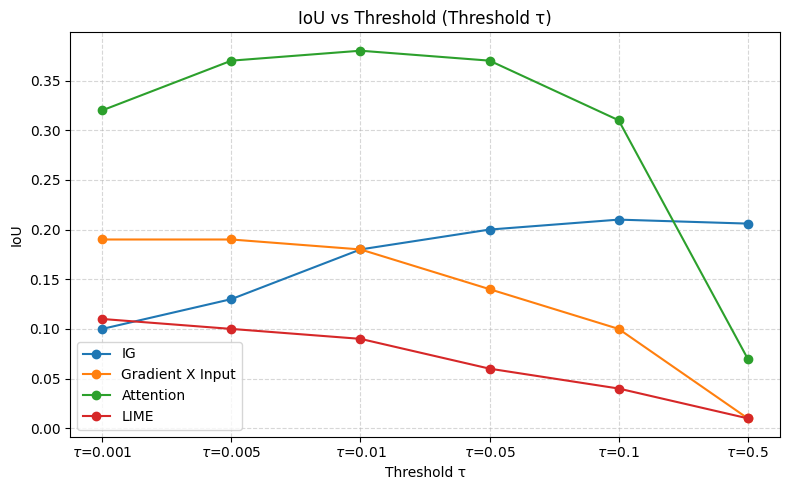

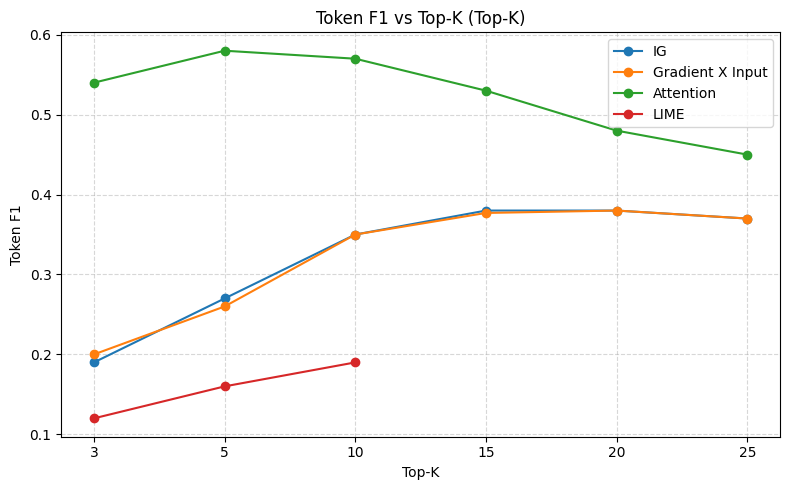

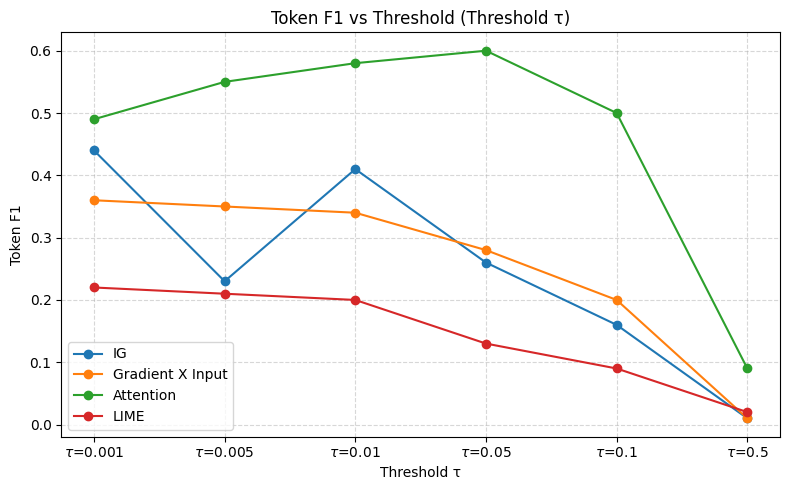

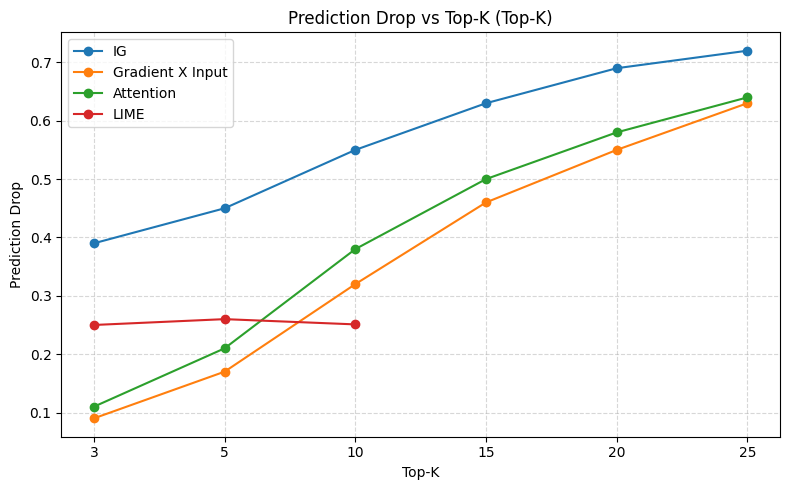

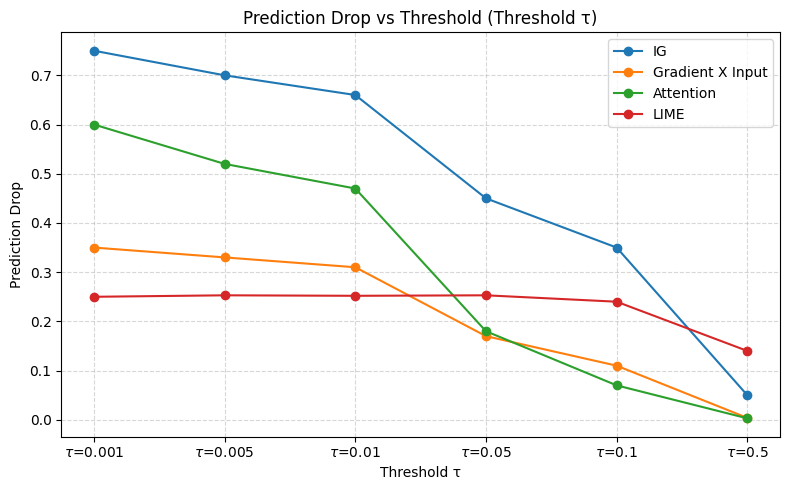

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define X values
k_values_common = [3, 5, 10, 15, 20, 25]
k_values_lime = [3, 4, 5, 6, 7, 8, 9, 10]
tau_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
tau_labels = [r'$\tau$=0.001', r'$\tau$=0.005', r'$\tau$=0.01', r'$\tau$=0.05', r'$\tau$=0.1', r'$\tau$=0.5']

# Data
data = {
    'IG': {
        'top_k': {
            'IoU': [0.10, 0.13, 0.18, 0.20, 0.21, 0.20],
            'Token F1': [0.19, 0.27, 0.35, 0.38, 0.38, 0.37],
            'Prediction Drop': [0.39, 0.45, 0.55, 0.63, 0.69, 0.72]
        },
        'threshold': {
            'IoU': [0.10, 0.13, 0.18, 0.20, 0.21, 0.206],
            'Token F1': [0.44, 0.23, 0.41, 0.26, 0.16, 0.01],
            'Prediction Drop': [0.75, 0.70, 0.66, 0.45, 0.35, 0.05]
        }
    },
    'Gradient X Input': {
        'top_k': {
            'IoU': [0.10, 0.13, 0.18, 0.20, 0.20, 0.20],
            'Token F1': [0.20, 0.26, 0.35, 0.377, 0.38, 0.37],
            'Prediction Drop': [0.09, 0.17, 0.32, 0.46, 0.55, 0.63]
        },
        'threshold': {
            'IoU': [0.19, 0.19, 0.18, 0.14, 0.10, 0.01],
            'Token F1': [0.36, 0.35, 0.34, 0.28, 0.20, 0.01],
            'Prediction Drop': [0.35, 0.33, 0.31, 0.17, 0.11, 0.0039]
        }
    },
    'Attention': {
        'top_k': {
            'IoU': [0.31, 0.33, 0.32, 0.30, 0.28, 0.26],
            'Token F1': [0.54, 0.58, 0.57, 0.53, 0.48, 0.45],
            'Prediction Drop': [0.11, 0.21, 0.38, 0.50, 0.58, 0.64]
        },
        'threshold': {
            'IoU': [0.32, 0.37, 0.38, 0.37, 0.31, 0.07],
            'Token F1': [0.49, 0.55, 0.58, 0.60, 0.50, 0.09],
            'Prediction Drop': [0.60, 0.52, 0.47, 0.18, 0.07, 0.003]
        }
    },
    'LIME': {
        'top_k': {
            'IoU': [0.06, 0.07, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09],
            'Token F1': [0.12, 0.15, 0.16, 0.17, 0.18, 0.18, 0.19, 0.19],
            'Prediction Drop': [0.25, 0.253, 0.26, 0.25, 0.253, 0.251, 0.253, 0.251]
        },
        'threshold': {
            'IoU': [0.11, 0.10, 0.09, 0.06, 0.04, 0.01],
            'Token F1': [0.22, 0.21, 0.20, 0.13, 0.09, 0.02],
            'Prediction Drop': [0.25, 0.253, 0.252, 0.253, 0.24, 0.14]
        }
    }
}

# Helper function
def plot_metric(metric, data_key, x_values, x_labels=None, title_suffix=''):
    plt.figure(figsize=(8, 5))
    for method, method_data in data.items():
        y = method_data[data_key].get(metric)
        if y is not None:
            if data_key == 'top_k':
                # Trim LIME's x-range to match others (only plot values up to K=10)
                if method == 'LIME':
                    # Match LIME values to corresponding top-k values [3,4,5,6,7,8,9,10]
                    lime_k = [3, 4, 5, 6, 7, 8, 9, 10]
                    valid_indices = [i for i, k in enumerate(lime_k) if k in x_values]
                    y = [y[i] for i in valid_indices]
                    x_idx = [x_values.index(lime_k[i]) for i in valid_indices]
                    plt.plot(x_idx, y, marker='o', label=method)
                else:
                    plt.plot(range(len(x_values)), y, marker='o', label=method)
            else:
                plt.plot(range(len(x_values)), y, marker='o', label=method)

    plt.title(f'{metric} vs {"Top-K" if data_key=="top_k" else "Threshold"} {title_suffix}')
    plt.ylabel(metric)
    plt.xlabel('Top-K' if data_key == 'top_k' else 'Threshold τ')
    plt.xticks(range(len(x_values)), x_labels if x_labels else x_values)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Plot all six graphs
plot_metric('IoU', 'top_k', k_values_common, title_suffix='(Top-K)')
plot_metric('IoU', 'threshold', tau_values, tau_labels, '(Threshold τ)')

plot_metric('Token F1', 'top_k', k_values_common, title_suffix='(Top-K)')
plot_metric('Token F1', 'threshold', tau_values, tau_labels, '(Threshold τ)')

plot_metric('Prediction Drop', 'top_k', k_values_common, title_suffix='(Top-K)')
plot_metric('Prediction Drop', 'threshold', tau_values, tau_labels, '(Threshold τ)')
